<h1>Evolution of regional disease burden (1996–2019)</h1>

In [1]:
# 1. Load Necessary Libraries
# Data manipulation and pipeline management (%>% operator)
# Used for filtering the cohort (N=4,602) and aggregating annual counts
library(dplyr) 

# Core visualization engine for Figure 1A and 1B
# Handles the Loess regression smoothing and 95% CI ribbon generation
library(ggplot2) 

# Essential for standardizing the 'Date of Diagnosis' column
# Ensures years are correctly extracted from registry timestamps (1996–2019)
library(lubridate)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




<h2>Section 1: Data Preparation </h2>

In [2]:
# 2. Load Data
raw_data <- read.csv("data/data.csv")

In [3]:
# 3. Prepare Incidence Data from RAW FILE
# We count how many patients were diagnosed each year
incidence_data <- raw_data %>%
  mutate(
    Year = year(ymd(Fecha_diag)),
    Sex = factor(Sexo, levels = c("Mujer", "Hombre"), labels = c("Female", "Male"))
  ) %>%
  # Filter strictly for the study period and Adults
  filter(Year >= 1996, Year <= 2019) %>%
  filter((as.numeric(Anio_diag) - as.numeric(Anio_nac)) >= 18)

In [4]:
# 3. Aggregation
# Global Counts per Year
global_counts <- incidence_data %>%
  count(Year) %>%
  rename(Cases = n)

# Sex Counts per Year
sex_counts <- incidence_data %>%
  count(Year, Sex) %>%
  rename(Cases = n)

<h2>Section 2: Trends in annual lymphoma case volume</h2>

In [5]:
# 4. --- PANEL A: GLOBAL TREND (Absolute Cases) ---
p1_new <- ggplot(global_counts, aes(x = Year, y = Cases)) +
  # Observed Data Points
  geom_point(size = 3, color = "black") +
  geom_line(linewidth = 1, color = "gray50") +

  # Smoothed Trend Line (Loess Regression) to show the rise
  geom_smooth(method = "loess", span = 0.5, color = "#E01E5A", fill = "#E01E5A", alpha = 0.15) +

  scale_x_continuous(breaks = seq(1996, 2019, 2)) +
  scale_y_continuous(limits = c(0, NA)) + # Start at 0 to show true scale

  labs(title = "Figure 1A. Annual Volume of New Lymphoma Cases in Quito (1996–2019)",
       subtitle = "Observed number of new cases per year (Adults >18)",
       y = "Number of New Cases",
       x = "Year of Diagnosis",
       caption = "Data Source: Raw Data, National Tumor Registry (N=4,602). \nRed line indicates smoothed trend.") +

  theme_classic(base_size = 16) +
  theme(
    plot.title = element_text(face = "bold"),
    axis.text.x = element_text(angle = 45, hjust = 1),
    panel.grid.major.y = element_line(color = "gray90")
  )

<h2>Section 3: Temporal trends in lymphoma case volume stratified by sex</h2>

In [6]:
# 5. --- PANEL B: TREND BY SEX ---
p2_new <- ggplot(sex_counts, aes(x = Year, y = Cases, group = Sex, color = Sex, fill = Sex)) +

  # Trend Lines
  geom_point(size = 2, alpha = 0.7) +

  # Smoothed Ribbons
  geom_smooth(method = "loess", span = 0.5, alpha = 0.2, linewidth = 1.2) +

  # Colors (Lancet Style: Blue/Red)
  scale_color_manual(values = c("Male" = "#00468B", "Female" = "#ED0000")) +
  scale_fill_manual(values = c("Male" = "#00468B", "Female" = "#ED0000")) +

  scale_x_continuous(breaks = seq(1996, 2019, 2)) +
  scale_y_continuous(limits = c(0, NA)) +

  labs(title = "Figure 1B. Annual Lymphoma Cases Stratified by Sex",
       subtitle = "Male vs. Female Case Volume (1996–2019)",
       y = "Number of New Cases",
       x = "Year of Diagnosis",
       caption = "Data Source: Raw Data, National Tumor Registry (N=4,602).") +

  theme_classic(base_size = 16) +
  theme(
    plot.title = element_text(face = "bold"),
    legend.position = "top",
    legend.title = element_blank(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    panel.grid.major.y = element_line(color = "gray90")
  )

<h2>Section 4: Save figures</h2>

In [10]:
# 6. SAVE FIGURES
dir.create("images", showWarnings = FALSE)

ggsave("images/Figure1_A_Global_Cases.png", plot = p1_new, width = 20, height = 7, dpi = 1200)
ggsave("images/Figure1_B_Sex_Cases.png", plot = p2_new, width = 20, height = 7, dpi = 1200)

print("New Figures 1 A and B saved based on N=4602 raw data.")

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


[1] "New Figures 1 A and B saved based on N=4602 raw data."


`geom_smooth()` using formula = 'y ~ x'


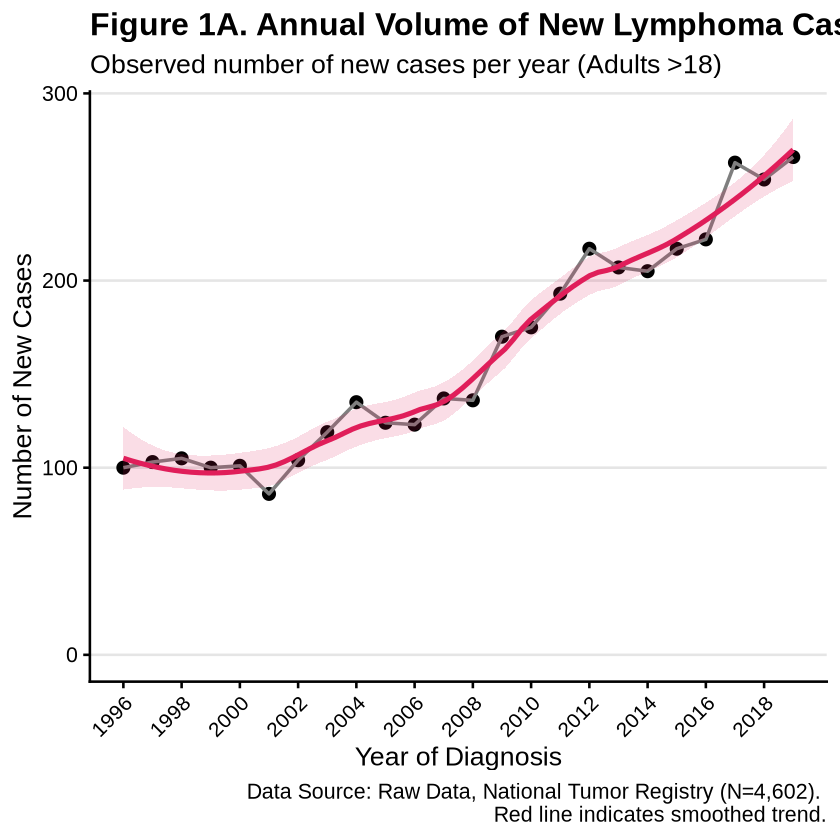

In [8]:
p1_new

`geom_smooth()` using formula = 'y ~ x'


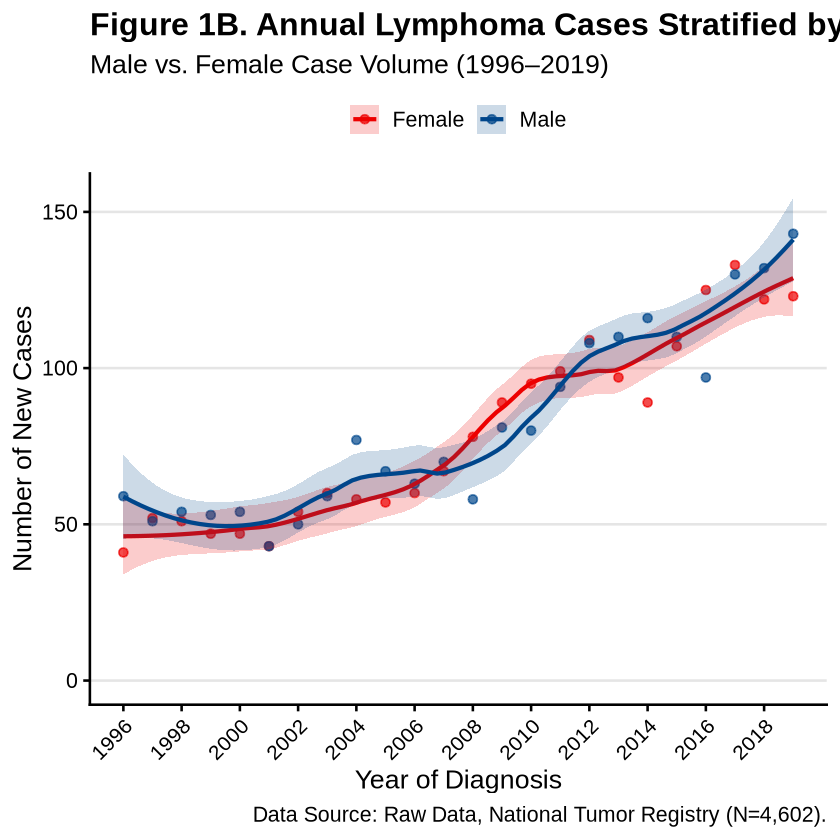

In [9]:
p2_new